In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from scipy import stats
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')

In [3]:
HP200a = pd.read_csv('../Data/Experiment 1/HP200.csv')
HP200a.tail()

,Amino Acid Length,Num Hydrophobic,Num Polar,1D protein,2D protein,Amino Acids on Grid,Trimmed 2D protein,Shape 2D protein,Amino Acid Order,Amino Acid Direction,H-Bonds,H-Ratio
39995,200,182,18,"['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,144,[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,"(22, 28)","[('H', (200, 200)), ('H', (200, 201)), ('H', (...","['Start', 'straight', 'straight', 'right', 'st...",37,0.256944
39996,200,109,91,"['P', 'H', 'H', 'H', 'H', 'P', 'H', 'H', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,72,[['' '' '' '' '' '' 'P' 'H' 'P' 'H' 'P' '' '' ...,"(16, 14)","[('P', (200, 200)), ('H', (200, 201)), ('H', (...","['Start', 'straight', 'right', 'straight', 'ri...",8,0.111111
39997,200,11,189,"['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,132,[['' '' '' '' '' '' '' '' '' '' '' '' '' '' 'P...,"(24, 20)","[('P', (200, 200)), ('P', (200, 199)), ('P', (...","['Start', 'straight', 'straight', 'left', 'str...",0,0.000000
39998,200,196,4,"['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,60,[['' '' '' '' 'H' 'H' 'H' 'H' '' '' '' '' '']\...,"(8, 13)","[('H', (200, 200)), ('H', (201, 200)), ('H', (...","['Start', 'straight', 'right', 'left', 'right'...",27,0.450000
39999,200,39,161,"['P', 'H', 'P', 'H', 'P', 'H', 'P', 'P', 'P', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,38,[['' '' '' '' '' '' '' '' '' '' '' 'P' 'P']\n ...,"(10, 13)","[('P', (200, 200)), ('H', (200, 199)), ('P', (...","['Start', 'straight', 'right', 'left', 'left',...",0,0.000000


In [4]:
HP200a.describe()

,Amino Acid Length,Num Hydrophobic,Num Polar,Amino Acids on Grid,H-Bonds,H-Ratio
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,102.500000,51.165950,51.334050,53.943025,6.438625,0.114484
std,57.717703,44.467726,44.430132,36.290847,8.835377,0.122527
min,5.000000,1.000000,1.000000,5.000000,0.000000,0.000000
25%,53.750000,14.000000,15.000000,26.000000,0.000000,0.000000
50%,102.500000,38.000000,39.000000,45.000000,3.000000,0.072727
75%,151.250000,77.000000,78.000000,74.000000,9.000000,0.192308
max,200.000000,199.000000,199.000000,200.000000,87.000000,0.625000


In [5]:
HP200b = pd.read_csv('../Data/Experiment 2/HP200.csv')
HP200b.tail()

,Amino Acid Length,Num Hydrophobic,Num Polar,1D protein,2D protein,Amino Acids on Grid,Trimmed 2D protein,Shape 2D protein,Amino Acid Order,Amino Acid Direction,H-Bonds,H-Ratio
39995,200,168,32,"['H', 'H', 'P', 'H', 'H', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,16,[['' '' '' 'H' 'H' '' '']\n ['H' 'H' 'P' 'H' '...,"(6, 7)","[('H', (200, 200)), ('H', (200, 201)), ('P', (...","['Start', 'straight', 'straight', 'right', 'le...",1,0.062500
39996,200,119,81,"['P', 'P', 'H', 'H', 'H', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,19,[['' '' '' '' '' '' 'P' 'P']\n ['' '' '' '' ''...,"(5, 8)","[('P', (200, 200)), ('P', (200, 201)), ('H', (...","['Start', 'straight', 'right', 'right', 'strai...",2,0.105263
39997,200,193,7,"['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,13,[['H' 'H' '' '' '' 'H' 'H']\n ['' 'H' 'H' '' '...,"(3, 7)","[('H', (200, 200)), ('H', (200, 201)), ('H', (...","['Start', 'straight', 'right', 'left', 'right'...",2,0.153846
39998,200,175,25,"['H', 'H', 'H', 'H', 'H', 'P', 'H', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,18,[['H' 'H' 'H' '' '' 'H' 'H']\n ['P' 'H' 'H' 'H...,"(3, 7)","[('H', (200, 200)), ('H', (200, 201)), ('H', (...","['Start', 'straight', 'right', 'straight', 'ri...",4,0.222222
39999,200,122,78,"['H', 'P', 'H', 'P', 'P', 'P', 'P', 'H', 'H', ...",[['' '' '' '' '' '' '' '' '' '' '' '' '' '' ''...,32,[['' '' 'P' 'P' '' 'H' 'H' 'P' '' '' '' '' '' ...,"(8, 16)","[('H', (200, 200)), ('P', (200, 201)), ('H', (...","['Start', 'straight', 'straight', 'left', 'str...",0,0.000000


In [6]:
HP200b.describe()

,Amino Acid Length,Num Hydrophobic,Num Polar,Amino Acids on Grid,H-Bonds,H-Ratio
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,102.500000,51.489375,51.010625,13.507350,0.919600,0.070763
std,57.717703,44.572421,44.101027,8.783614,1.405431,0.096911
min,5.000000,1.000000,1.000000,4.000000,0.000000,0.000000
25%,53.750000,15.000000,15.000000,7.000000,0.000000,0.000000
50%,102.500000,39.000000,38.000000,11.000000,0.000000,0.000000
75%,151.250000,78.000000,78.000000,17.000000,1.000000,0.125000
max,200.000000,199.000000,199.000000,95.000000,17.000000,0.555556


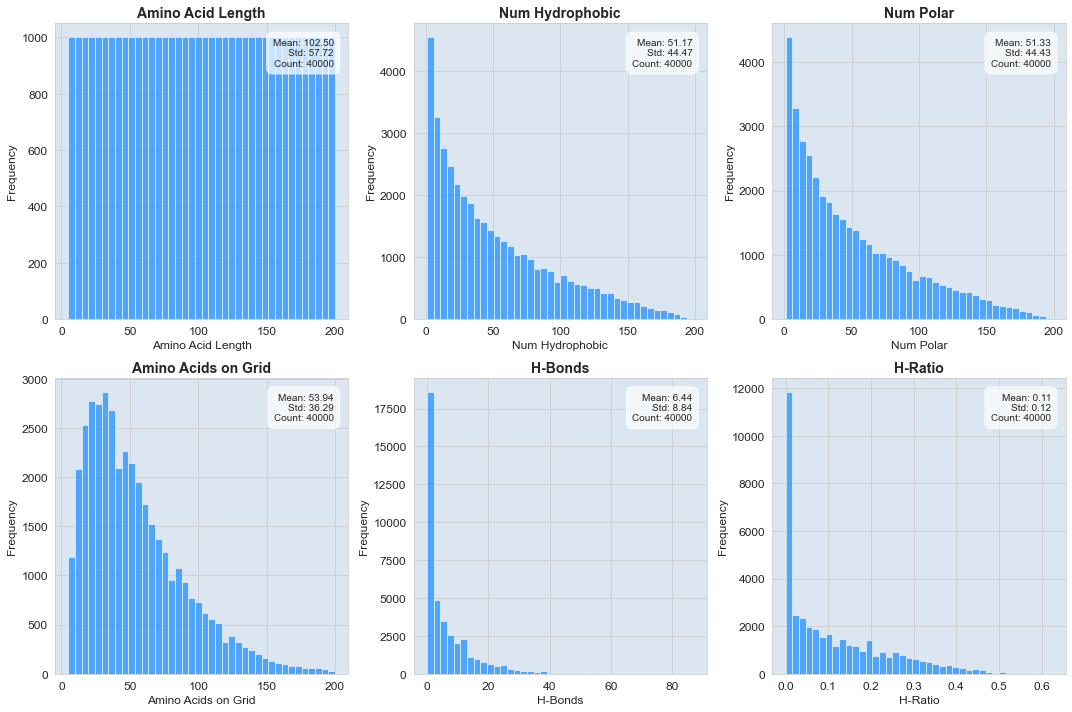

In [7]:
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Getting descriptive statistics
desc_stats = HP200a.describe()

# Selecting only numeric columns for plotting
num_cols = HP200a.select_dtypes(include=['number']).columns

# Determine the layout of the subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculating the number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the array to easily loop through it

# Plot histograms for each numeric column
for ax, col in zip(axes, num_cols):
    sns.histplot(HP200a[col], bins=40, ax=ax, color='dodgerblue')
    ax.set_title(col, fontsize=14, weight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Extracting descriptive stats for each column
    mean = desc_stats.at['mean', col]
    std = desc_stats.at['std', col]
    count = int(desc_stats.at['count', col])

    # Creating a text string with the descriptive stats
    stats_text = f'Mean: {mean:.2f}\nStd: {std:.2f}\nCount: {count}'

    # Adding a larger box for descriptive stats in the upper right corner
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white', alpha=0.7))

# Turn off any unused subplots
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# plt.savefig("descriptives experiment 1.png", format='png', dpi=1000)
plt.show()

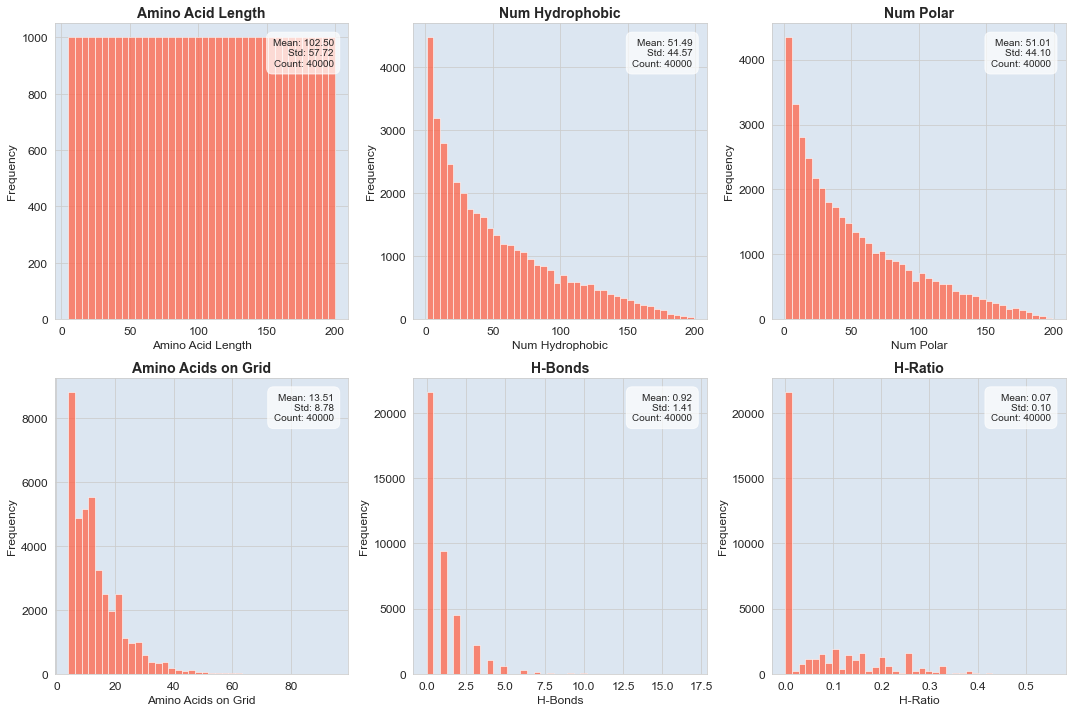

In [8]:
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Getting descriptive statistics
desc_stats = HP200b.describe()

# Selecting only numeric columns for plotting
num_cols = HP200a.select_dtypes(include=['number']).columns

# Determine the layout of the subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculating the number of rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the array to easily loop through it

# Plot histograms for each numeric column
for ax, col in zip(axes, num_cols):
    sns.histplot(HP200b[col], bins=40, ax=ax, color='tomato')
    ax.set_title(col, fontsize=14, weight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Extracting descriptive stats for each column
    mean = desc_stats.at['mean', col]
    std = desc_stats.at['std', col]
    count = int(desc_stats.at['count', col])

    # Creating a text string with the descriptive stats
    stats_text = f'Mean: {mean:.2f}\nStd: {std:.2f}\nCount: {count}'

    # Adding a larger box for descriptive stats in the upper right corner
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.6', facecolor='white', alpha=0.7))

# Turn off any unused subplots
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# plt.savefig("descriptives experiment 2.png", format='png', dpi=1000)
plt.show()

In [9]:
shapes1 = HP200a.groupby(['Amino Acid Length', 'Amino Acids on Grid']).size().reset_index(name='Quantity')
shapes1 = shapes1[(shapes1['Amino Acids on Grid'] % 5 == 0) & (shapes1['Amino Acid Length'] == shapes1['Amino Acids on Grid'])]  # Updated this line
shapes1 = shapes1.drop(columns='Amino Acid Length')
shapes1.head()

,Amino Acids on Grid,Quantity
0,5,1000
3,10,992
11,15,957
24,20,932
42,25,868


In [10]:
shapes2 = HP200b.groupby(['Amino Acid Length', 'Amino Acids on Grid']).size().reset_index(name='Quantity')
shapes2 = shapes2[(shapes2['Amino Acids on Grid'] % 5 == 0) & (shapes2['Amino Acid Length'] == shapes2['Amino Acids on Grid'])]  # Updated this line
shapes2 = shapes2.drop(columns='Amino Acid Length')
shapes2.head()

,Amino Acids on Grid,Quantity
1,5,935
8,10,619
20,15,366
37,20,217
59,25,108


In [11]:
# Convert the data dictionary to a pandas DataFrame
df = pd.DataFrame(shapes2)

# Extract the x and y values from the DataFrame
xdata = df['Amino Acids on Grid']
ydata = df['Quantity']

# Define the model function to fit
def model_func(x, a, b):
    return a * np.exp(-b * x)

# Use curve_fit to find the best-fit parameters, providing an initial guess
initial_guess = [max(ydata), 0.1]  # initial guesses for a and b
popt, pcov = curve_fit(model_func, xdata, ydata, p0=initial_guess, maxfev=5000)

# popt contains the best-fit parameters for a and b
a, b = popt

# Define the function for calculating P(Zero Violations)
def probability_zero_violations(n, a=a, b=b):
    """
    Calculate the probability of zero violations using the formula: (a/1000) * e^(-b * n)

    Parameters:
    n (float): The grid size (number of amino acids on the grid).
    a (float): The scale factor from the curve fitting, adjusted for probability.
    b (float): The decay rate from the curve fitting.

    Returns:
    float: The calculated probability of zero violations.
    """
    print(a, (a/ 1000), np.exp(-b * n))
    return (a / 1000) * np.exp(-b * n)

# Example usage of the function
n_value = 10  # Grid size of 10 amino acids
probability = probability_zero_violations(n_value)

1556.8763040087551 1.5568763040087552 0.37509489160490517


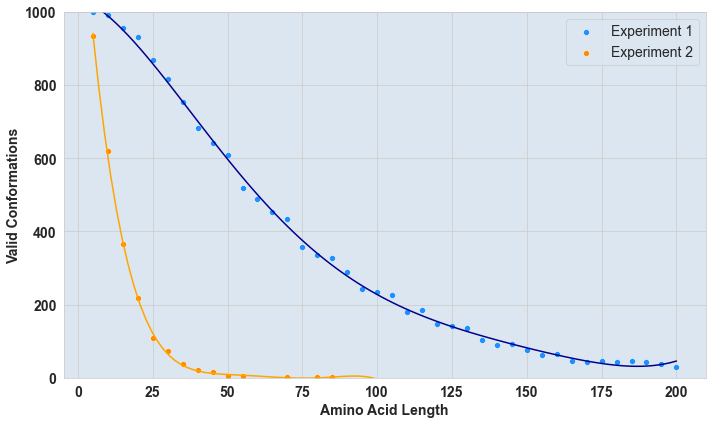

In [12]:
# Degree of the polynomial fit
degree =5  

# Fit polynomial regression to shapes1
coeffs1 = np.polyfit(shapes1['Amino Acids on Grid'], shapes1['Quantity'], degree)
# Fit polynomial regression to shapes2
coeffs2 = np.polyfit(shapes2['Amino Acids on Grid'], shapes2['Quantity'], degree)

# Generating x values from the range of your data for plotting the polynomial curve
x_values = np.linspace(min(shapes1['Amino Acids on Grid'].min(), shapes2['Amino Acids on Grid'].min()), 
                       max(shapes1['Amino Acids on Grid'].max(), shapes2['Amino Acids on Grid'].max()), 100)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})
sns.scatterplot(data=shapes1, x='Amino Acids on Grid', y='Quantity', color='dodgerblue', label='Experiment 1')
sns.scatterplot(data=shapes2, x='Amino Acids on Grid', y='Quantity', color='darkorange', label='Experiment 2')

# Plotting the polynomial regression curves
plt.plot(x_values, np.polyval(coeffs1, x_values), color='darkblue')
plt.plot(x_values, np.polyval(coeffs2, x_values), color='orange')

plt.xlabel("Amino Acid Length", fontsize=14, fontweight='bold')
plt.ylabel("Valid Conformations", fontsize=14, fontweight='bold')
plt.ylim(bottom=0, top=1000)  # Setting the y-axis range
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

plt.legend(fontsize=14)
plt.tight_layout()
# plt.savefig("valid conformation per amino acid length.png", format='png', dpi=1000)
plt.show()

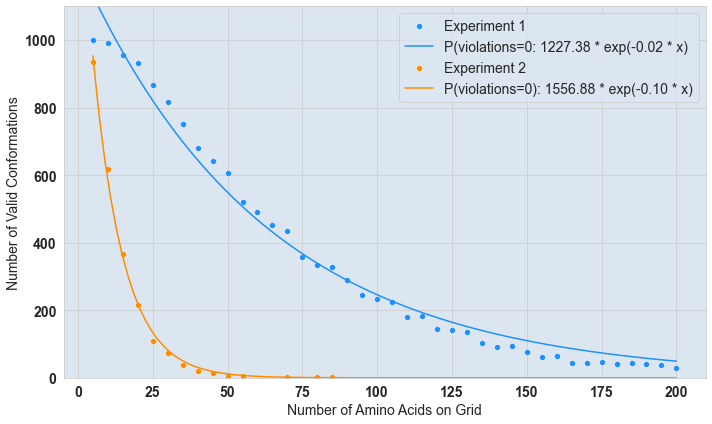

In [13]:
def model_func(x, a, b):
    return a * np.exp(-b * x)

# Function to perform curve fitting and return parameters
def fit_curve(df):
    xdata = df['Amino Acids on Grid']
    ydata = df['Quantity']
    initial_guess = [max(ydata), 0.1]
    popt, _ = curve_fit(model_func, xdata, ydata, p0=initial_guess, maxfev=5000)
    return popt

# Fit the curves
popt1 = fit_curve(pd.DataFrame(shapes1))
popt2 = fit_curve(pd.DataFrame(shapes2))

# Generating x values for plotting
x_min = min(shapes1['Amino Acids on Grid'].min(), shapes2['Amino Acids on Grid'].min())
x_max = max(shapes1['Amino Acids on Grid'].max(), shapes2['Amino Acids on Grid'].max())
x_values = np.linspace(x_min, x_max, 100)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})
sns.scatterplot(data=shapes1, x='Amino Acids on Grid', y='Quantity', color='dodgerblue', label='Experiment 1')
plt.plot(x_values, model_func(x_values, *popt1), color='dodgerblue', label=f'P(violations=0: {popt1[0]:.2f} * exp(-{popt1[1]:.2f} * x)')
sns.scatterplot(data=shapes2, x='Amino Acids on Grid', y='Quantity', color='darkorange', label='Experiment 2')
plt.plot(x_values, model_func(x_values, *popt2), color='darkorange', label=f'P(violations=0): {popt2[0]:.2f} * exp(-{popt2[1]:.2f} * x)')


# Plotting the model function curves

plt.xlabel("Number of Amino Acids on Grid", fontsize=14)
plt.ylabel("Number of Valid Conformations", fontsize=14)
plt.ylim(bottom=0, top=1100)
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

plt.legend(fontsize=14)
plt.tight_layout()
# plt.savefig("valid conformation per amino acid length.png", format='png', dpi=1000)
plt.show()

In [14]:
data_experiment1 = HP200a['Amino Acids on Grid'].value_counts().sort_index(ascending=True)
data_experiment2 = HP200b['Amino Acids on Grid'].value_counts().sort_index(ascending=True)
data_experiment1.head()

Amino Acids on Grid
5     1000
8      108
9       83
10    1165
11     171
Name: count, dtype: int64

In [15]:
# Creating DataFrames from the Series for easier plotting
df1 = data_experiment1.reset_index()
df1.columns = ['Amino Acids on Grid', 'Quantity']
df1['Experiment'] = 'Experiment 1'

df2 = data_experiment2.reset_index()
df2.columns = ['Amino Acids on Grid', 'Quantity']
df2['Experiment'] = 'Experiment 2'

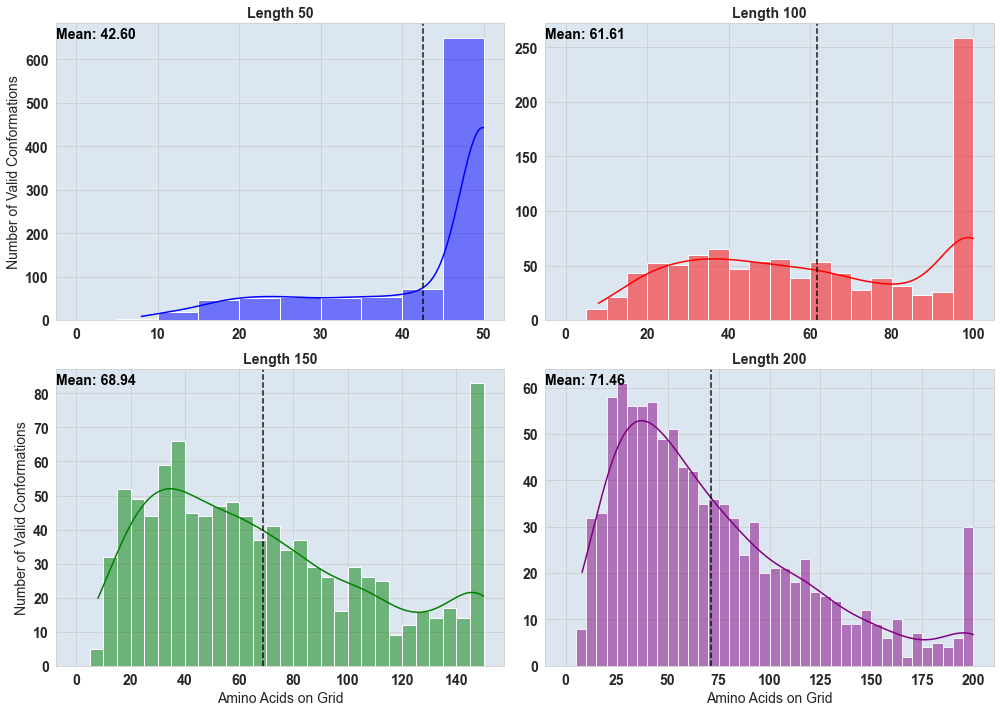

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the HP200 dataframe for each amino acid length
filtered_50 = HP200a[HP200a['Amino Acid Length'] == 50]
filtered_100 = HP200a[HP200a['Amino Acid Length'] == 100]
filtered_150 = HP200a[HP200a['Amino Acid Length'] == 150]
filtered_200 = HP200a[HP200a['Amino Acid Length'] == 200]

# Setting Seaborn style with a light grey/blue background
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})
plt.figure(figsize=(14, 10))

# Define function to customize ticks
def customize_plot():
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')

# Define function to plot mean line and annotate it
def annotate_mean(data):
    mean = data['Amino Acids on Grid'].mean()
    plt.axvline(mean, color='black', linestyle='--', alpha=0.9)
    plt.text(plt.gca().get_xlim()[0], plt.gca().get_ylim()[1] * 0.95, f'Mean: {mean:.2f}', horizontalalignment='left', color='black', fontsize=14, fontweight='bold')

# Setting bin size
bin_size = 5

# Create subplot for Length 50
plt.subplot(2, 2, 1)
sns.histplot(data=filtered_50, x='Amino Acids on Grid', kde=True, color="blue", bins=range(0, filtered_50['Amino Acids on Grid'].max() + bin_size, bin_size))
plt.title("Length 50", fontsize=14, fontweight='bold')
annotate_mean(filtered_50)
customize_plot()
plt.ylabel("Number of Valid Conformations", fontsize=14)  # Y label for the first subplot
plt.xlabel("") 

# Create subplot for Length 100
plt.subplot(2, 2, 2)
sns.histplot(data=filtered_100, x='Amino Acids on Grid', kde=True, color="red", bins=range(0, filtered_100['Amino Acids on Grid'].max() + bin_size, bin_size))
plt.title("Length 100", fontsize=14, fontweight='bold')
annotate_mean(filtered_100)
customize_plot()
plt.xlabel("")  
plt.ylabel("")  

# Create subplot for Length 150
plt.subplot(2, 2, 3)
sns.histplot(data=filtered_150, x='Amino Acids on Grid', kde=True, color="green", bins=range(0, filtered_150['Amino Acids on Grid'].max() + bin_size, bin_size))
plt.title("Length 150", fontsize=14, fontweight='bold')
annotate_mean(filtered_150)
customize_plot()
plt.xlabel("Amino Acids on Grid", fontsize=14)  
plt.ylabel("Number of Valid Conformations", fontsize=14) 

# Create subplot for Length 200
plt.subplot(2, 2, 4)
sns.histplot(data=filtered_200, x='Amino Acids on Grid', kde=True, color="purple", bins=range(0, filtered_200['Amino Acids on Grid']. max() + bin_size, bin_size))
plt.title("Length 200", fontsize=14, fontweight='bold')
annotate_mean(filtered_200)
customize_plot()
plt.xlabel("Amino Acids on Grid", fontsize=14)  
plt.ylabel("")

plt.tight_layout()
# plt.savefig("Distribution of valid conformations.png", format='png', dpi=1000)
plt.show()


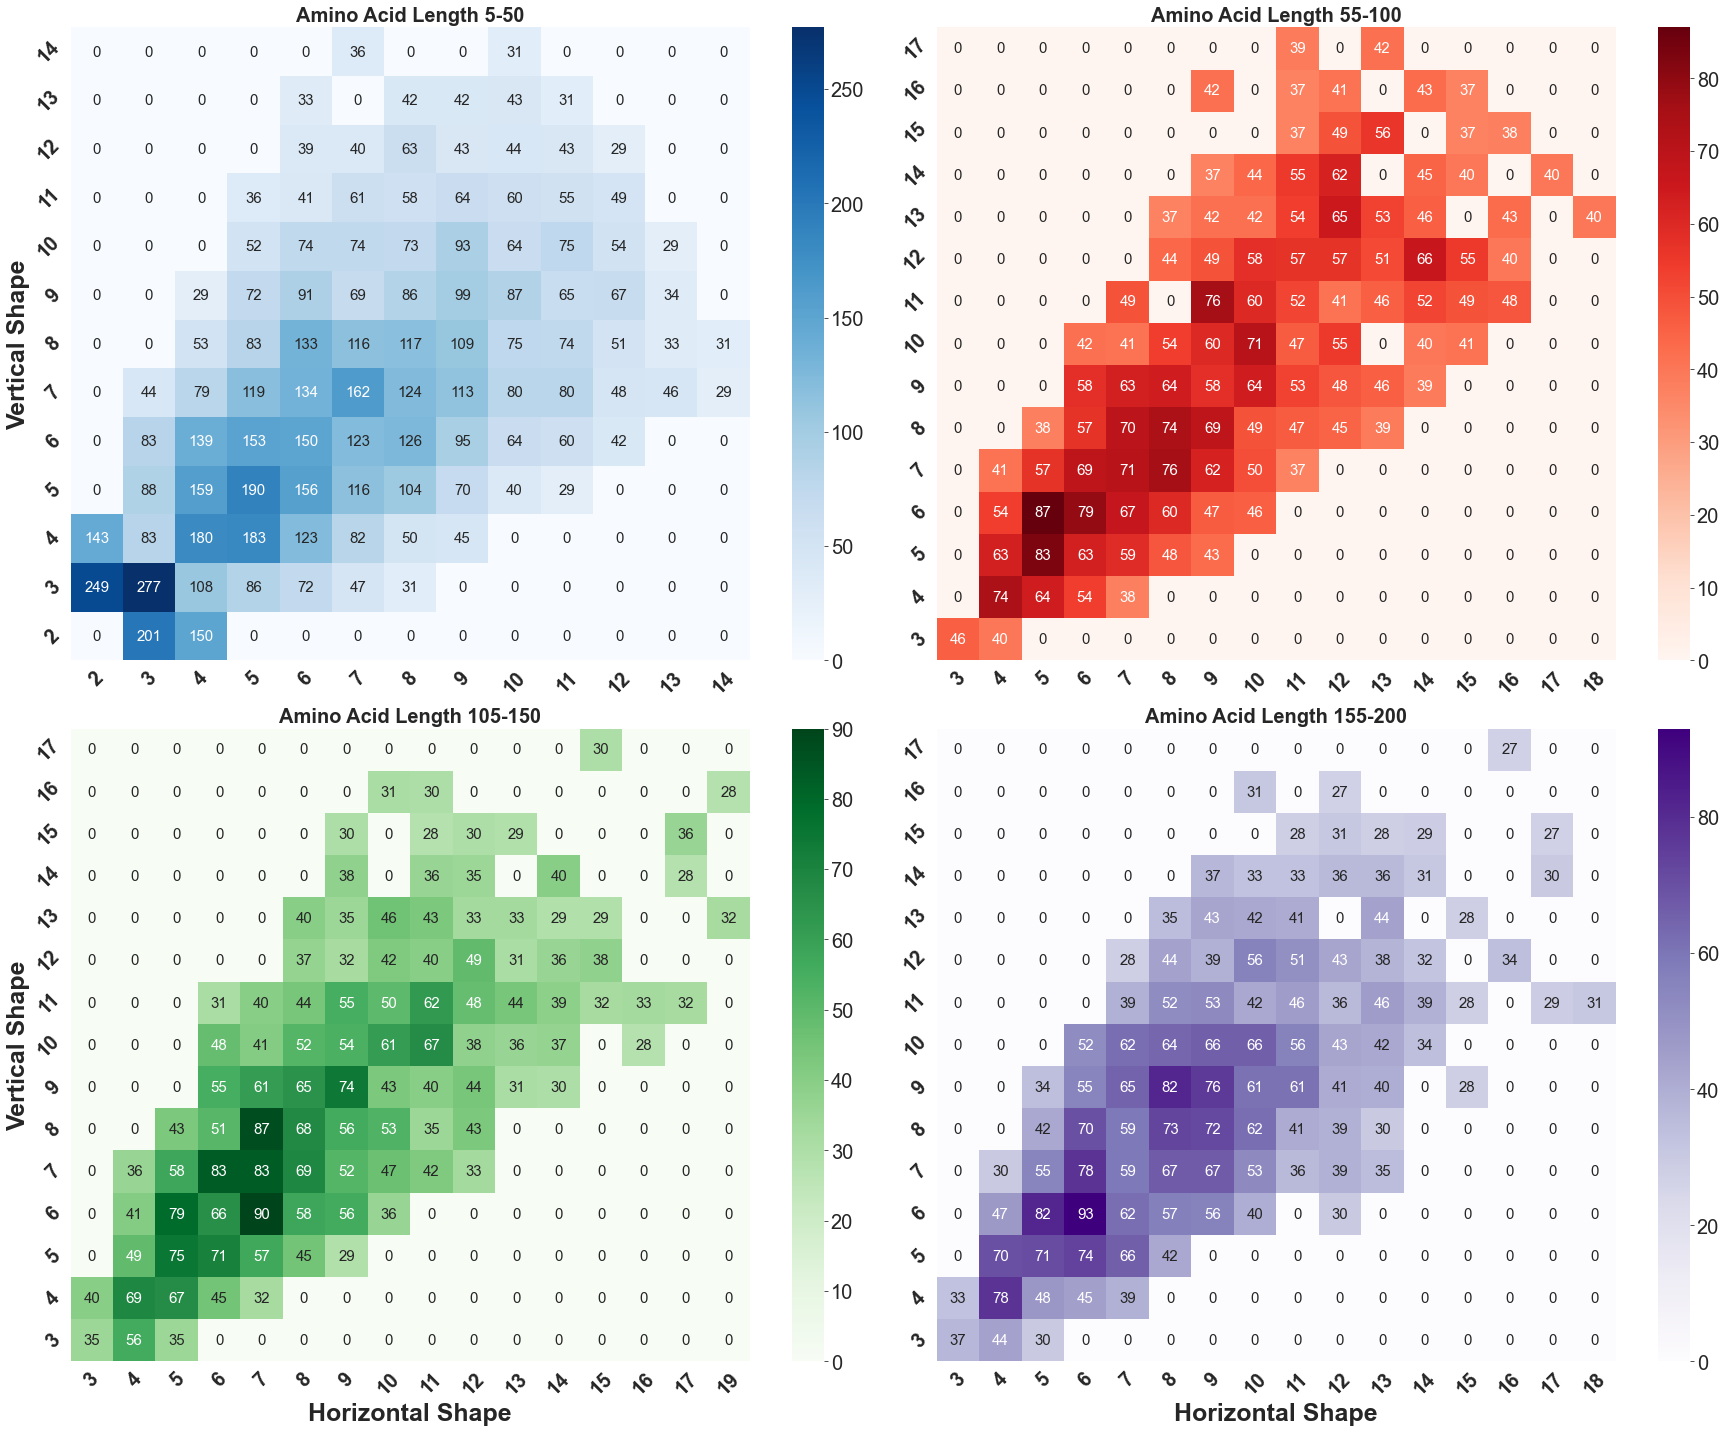

In [17]:
def plot_heatmap_for_length(dataframe, min_length, max_length, ax, colormap, show_x_label, show_y_label):
    # Filter dataframe based on range
    filtered_df = dataframe[(dataframe['Amino Acid Length'] > min_length) & (dataframe['Amino Acid Length'] <= max_length)]

    # Extract shape values
    filtered_df['Shape1'] = filtered_df['Shape 2D protein'].str.extract(r'\((.*?),').astype(int)
    filtered_df['Shape2'] = filtered_df['Shape 2D protein'].str.extract(r',\s(.*?)\)').astype(int)

    # Compute frequencies
    shape_combinations = filtered_df.groupby(['Shape1', 'Shape2']).size().reset_index(name='Quantity')
    top_combinations = shape_combinations.sort_values(by='Quantity', ascending=False).head(100)

    # Create a pivot table for the heatmap
    pivot_table = top_combinations.pivot(index='Shape1', columns='Shape2', values='Quantity').fillna(0)

    # Convert for annotations
    annotations = pivot_table.astype(int).astype(str)

    # Plotting
    heatmap = sns.heatmap(pivot_table, cmap=colormap, annot=annotations, fmt='', ax=ax, annot_kws={"size": 15})
    ax.set_title(f'Amino Acid Length {min_length+5}-{max_length}', fontsize=20, fontweight='bold')
    
    # Set axis labels based on the provided parameters
    ax.set_xlabel('Horizontal Shape' if show_x_label else '', fontsize=25, fontweight='bold')
    ax.set_ylabel('Vertical Shape' if show_y_label else '', fontsize=25, fontweight='bold')

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, fontweight='bold', rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=20, fontweight='bold', rotation=45)
    ax.invert_yaxis()

    # Adjust color bar label size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 20))
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

length_ranges = [(0, 50), (50, 100), (100, 150), (150, 200)]
colormaps = ['Blues', 'Reds', 'Greens', 'Purples']

# Define which plots should show axis labels
x_labels = [False, False, True, True]  # Show x labels for plots 3 and 4
y_labels = [True, False, True, False]  # Show y labels for plots 1 and 3

for ax, (min_length, max_length), colormap, x_label, y_label in zip(axs.ravel(), length_ranges, colormaps, x_labels, y_labels):
    plot_heatmap_for_length(HP200a, min_length, max_length, ax, colormap, x_label, y_label)

plt.tight_layout()
# plt.savefig("Distribution of shape combinations 2.png", format='png', dpi=100)
plt.show()

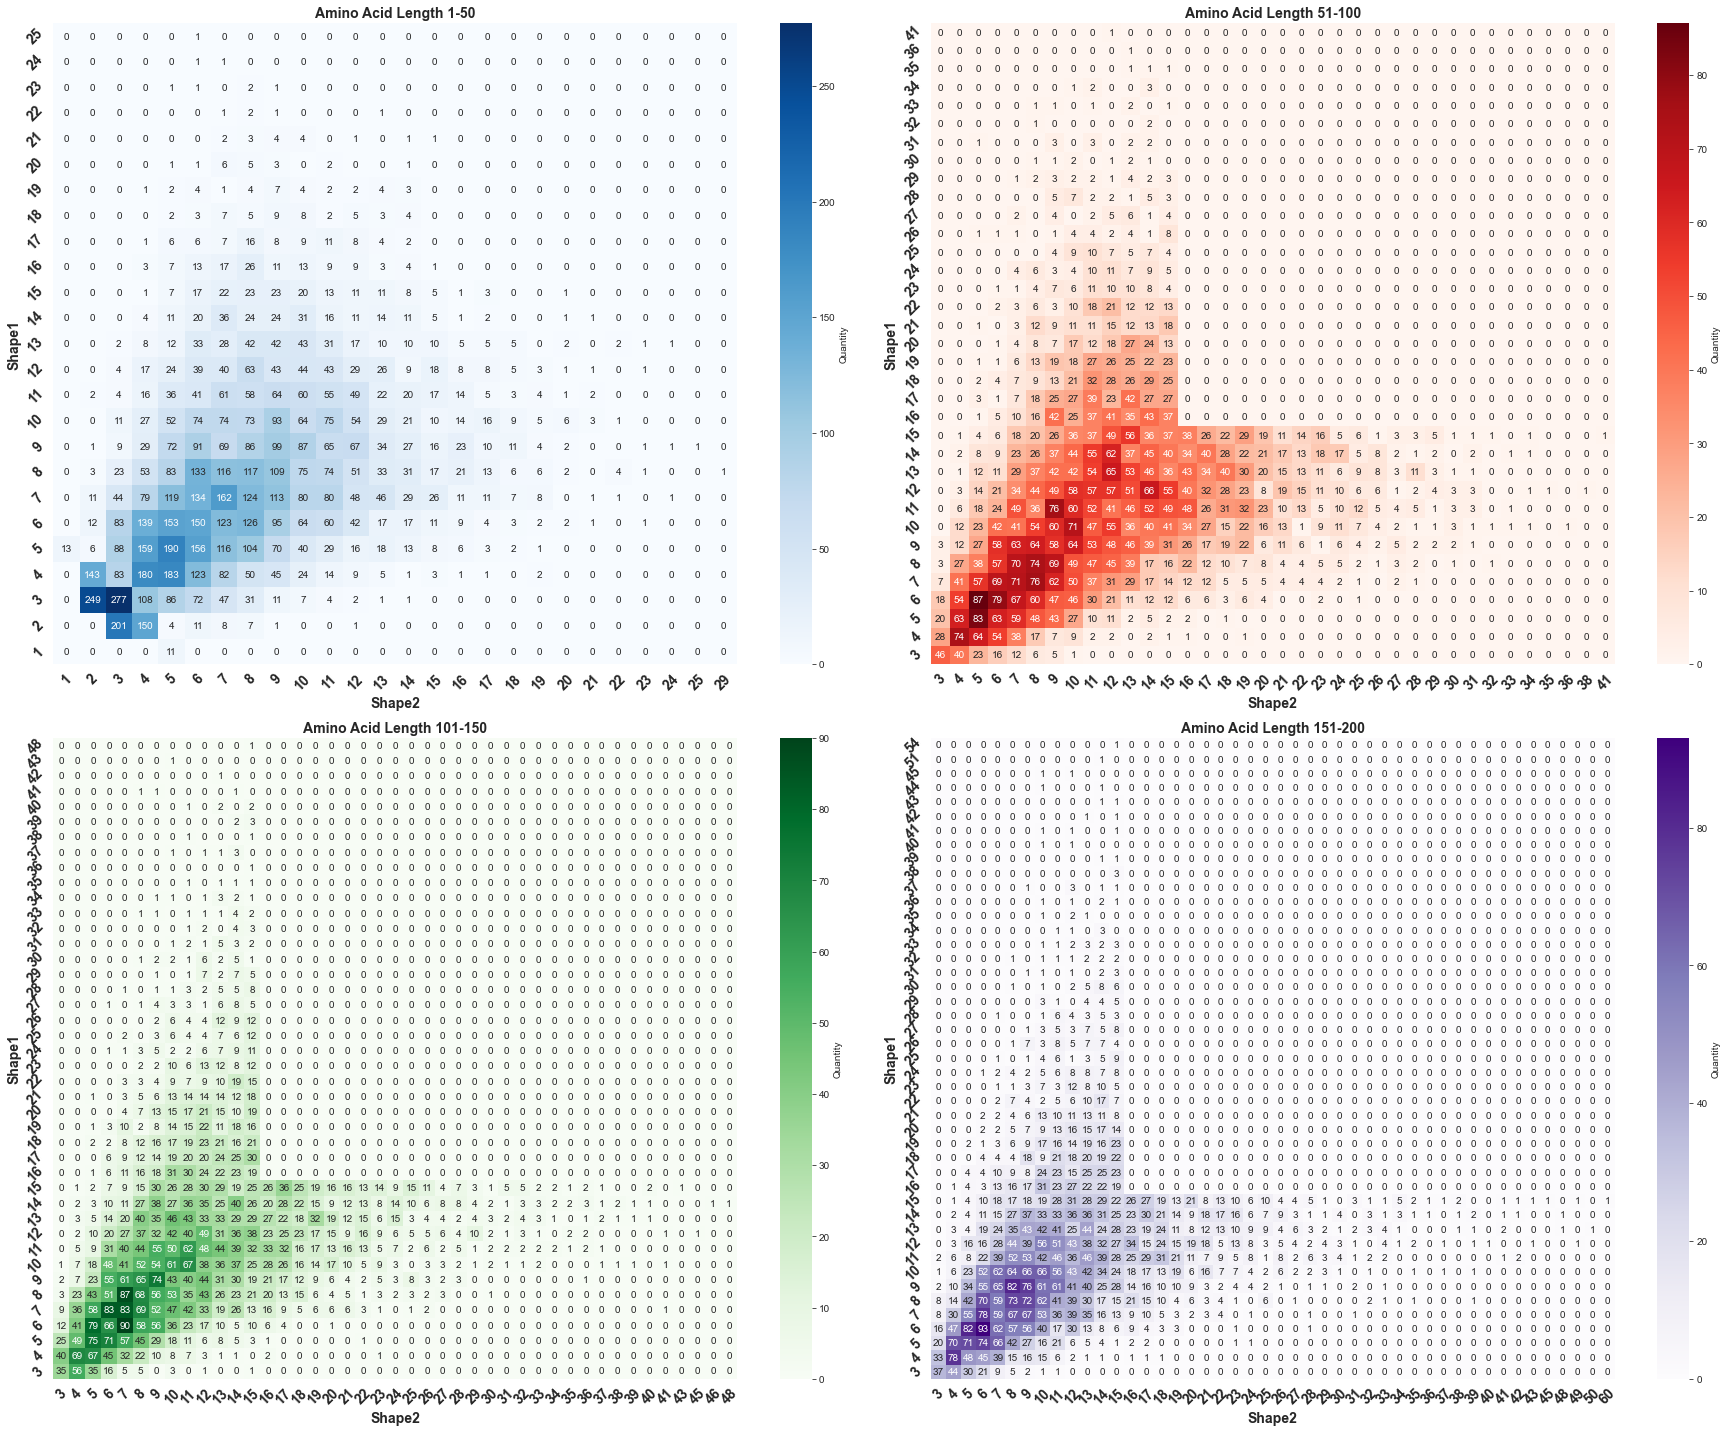

In [18]:
def plot_heatmap_for_length(dataframe, min_length, max_length, ax, colormap):
    # Filter dataframe based on range
    filtered_df = dataframe[(dataframe['Amino Acid Length'] > min_length) & (dataframe['Amino Acid Length'] <= max_length)]

    # Extract shape values
    filtered_df['Shape1'] = filtered_df['Shape 2D protein'].str.extract(r'\((.*?),').astype(int)
    filtered_df['Shape2'] = filtered_df['Shape 2D protein'].str.extract(r',\s(.*?)\)').astype(int)

    # Filter for shapes where either Shape1 or Shape2 is between 1 and 15
    condition = (filtered_df['Shape1'].between(1, 15)) | (filtered_df['Shape2'].between(1, 15))
    selected_combinations = filtered_df[condition]
    shape_combinations = selected_combinations.groupby(['Shape1', 'Shape2']).size().reset_index(name='Quantity')

    # Create pivot table
    pivot_table = shape_combinations.pivot(index='Shape1', columns='Shape2', values='Quantity').fillna(0)

    # Convert for annotations
    annotations = pivot_table.astype(int).astype(str)

    # Plotting
    sns.heatmap(pivot_table, cmap=colormap, annot=annotations, fmt='', cbar_kws={'label': 'Quantity'}, ax=ax)
    ax.set_title(f'Amino Acid Length {min_length+1}-{max_length}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Shape2', fontsize=14, fontweight='bold')
    ax.set_ylabel('Shape1', fontsize=14, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold', rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight='bold', rotation=45)
    ax.invert_yaxis()
    
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 20))
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

length_ranges = [(0, 50), (50, 100), (100, 150), (150, 200)]
colormaps = ['Blues', 'Reds', 'Greens', 'Purples']
for ax, (min_length, max_length), colormap in zip(axs.ravel(), length_ranges, colormaps):
    plot_heatmap_for_length(HP200a, min_length, max_length, ax, colormap)

plt.tight_layout()
plt.show()